In [1]:
name = "2021-02-11-python-reuse"
title = "Many ways to run Python"
tags = "basics, paths, imports, functions, jupyter"
author = "Callum Rollo"

In [2]:
from nb_tools import connect_notebook_to_post
from IPython.core.display import HTML

html = connect_notebook_to_post(name, title, tags, author)

# Reusable Python

This tutorial shows various methods of reusing your Python code. The follow up tutorial on packaging code will explore ways to make code reusable by others.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

### Step 0: functions

Functions are the simplest way to cut down duplicated code. The simple example we will use is sets up a specifically scaled multi axes figure

In [2]:
def go_figure():
    figure, axes = plt.subplots(2, 2, figsize=(10,6))
    axes = axes.ravel()

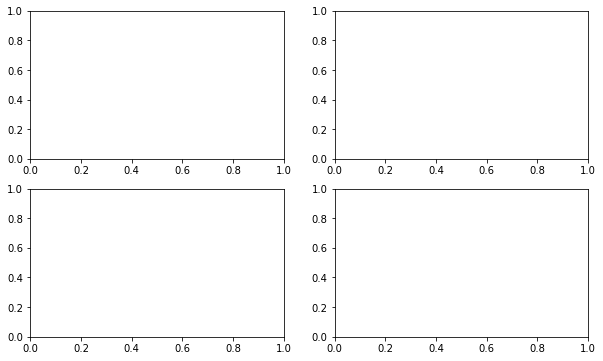

In [3]:
go_figure();

To make this function useful, we should return some objects to work with. In this case, we want fig and ax

In [4]:
def go_figure():
    figure, axes = plt.subplots(2, 2, figsize=(10,6), sharex='col', sharey='row')
    axes = axes.ravel()
    return figure, axes

In [5]:
# Some data to plot
t = np.arange(0,50,0.1)
y0 = np.sin(t)
y1 = np.cos(t/2)

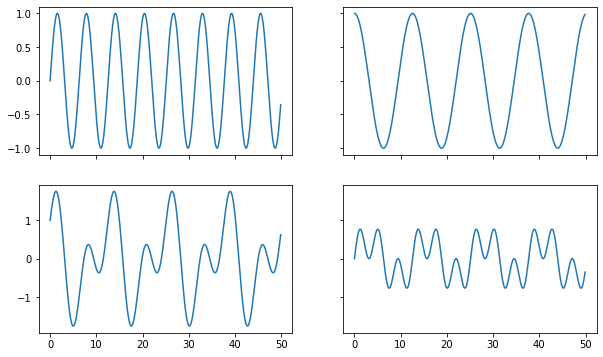

In [6]:
fig, ax = go_figure();
ax[0].plot(t,y0)
ax[1].plot(t,y1)
ax[2].plot(t ,y0 + y1)
ax[3].plot(t ,y0 * y1);

### Step 1: arguments

We can extend our functions with **arguments** (mandatory) and **key word arguments** (optional). You will often see the short-hand **args** and **kwargs** used to refer to these.

The pattern is:
```python
def function(arg0, arg1, kwarg0=default0, kwarg1=default1):
    do stuff
    return value0, value1
```

In [7]:
def go_figure(rows, cols, title=''):
    figure, axes = plt.subplots(rows, cols, figsize=(10,6), sharex='col', sharey='row')
    if type(axes) == np.array:
        axes = axes.ravel()
    figure.suptitle(title, fontsize=18)
    return figure, axes

Our functions now requires two arguments to be passed, rows and cols. Use arguments if you expect to change the value often



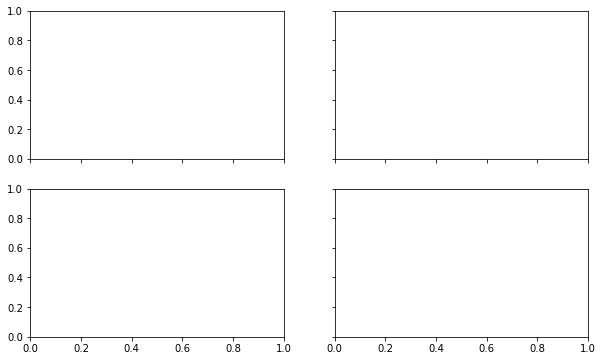

In [9]:
fig, ax  = go_figure(2,2)

Our figure also has a kwarg, title. Use kwargs for things you do not expect to change often. The default can be a typical value or an empty string or list. For example, I rarely use plot title

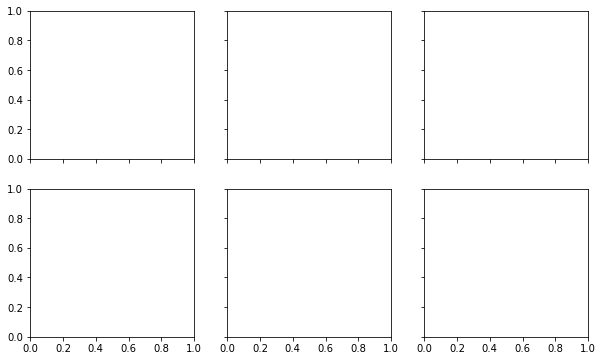

In [11]:
fig, ax  = go_figure(2, 3);

### Step 2: share between scripts in directory

I have created another function `sine_waves` in a script called **waves.py** in the same directory as this one. Note that this must be a plain Python file, not a jupyter notebook.

We can import this just as we would from a downloaded Python package

In [12]:
from waves import sine_combo

In [13]:
t, y0 = sine_combo()
__, y1 = sine_combo(f=(1,1.2))

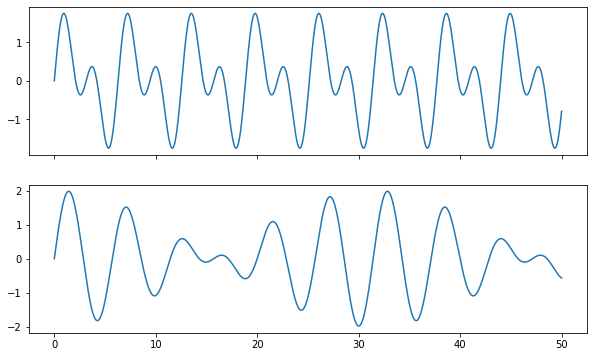

In [14]:
fig, ax = go_figure(2,1)
ax[0].plot(t,y0)
ax[1].plot(t,y1);

If you have scripts nested in directories, you can go into them with a `.` just as you would for sub-modules like `matplotlib.pyplot`

In [15]:
from adjacent_dir.more_waves import cosine_combo

In [16]:
t, y0 = cosine_combo()
t, y1 = cosine_combo(f=(1,1.1))

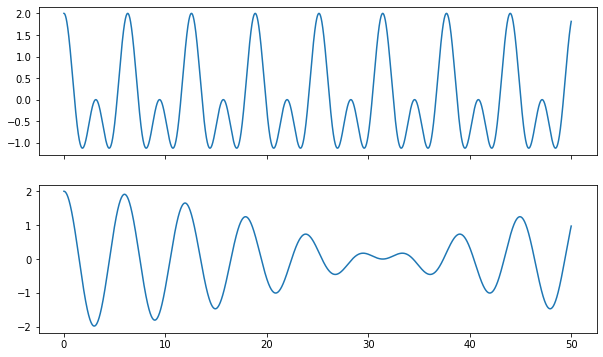

In [17]:
fig, ax = go_figure(2,1)
ax[0].plot(t,y0)
ax[1].plot(t,y1);

### Step 3: scripts in distant directories

If your script is located somewhere distant on your computer, Python won't know where it is.

By default, python only knows of locations in `sys.path`

In [18]:
import sys
sys.path

['/home/callum/Documents/uea_python/reusable-python',
 '/home/callum/anaconda3/envs/sci/lib/python39.zip',
 '/home/callum/anaconda3/envs/sci/lib/python3.9',
 '/home/callum/anaconda3/envs/sci/lib/python3.9/lib-dynload',
 '',
 '/home/callum/anaconda3/envs/sci/lib/python3.9/site-packages',
 '/home/callum/anaconda3/envs/sci/lib/python3.9/site-packages/IPython/extensions',
 '/home/callum/.ipython']

Notice that this includes the location of packages in your environments (an anaconda environment called **sci** in this case) and the folder of the script itself. This is how we can import from scripts next to ours or in subdirectories of the current directory, Python already knows about them.

`sys.path` is just a list, so we can append directories to it.

I have a set of scripts with handy functions in a directory called `python_scripts`. Let's add it to the path.

In [19]:
sys.path.append('/home/callum/Documents/coding/python_scripts')

In [20]:
sys.path

['/home/callum/Documents/uea_python/reusable-python',
 '/home/callum/anaconda3/envs/sci/lib/python39.zip',
 '/home/callum/anaconda3/envs/sci/lib/python3.9',
 '/home/callum/anaconda3/envs/sci/lib/python3.9/lib-dynload',
 '',
 '/home/callum/anaconda3/envs/sci/lib/python3.9/site-packages',
 '/home/callum/anaconda3/envs/sci/lib/python3.9/site-packages/IPython/extensions',
 '/home/callum/.ipython',
 '/home/callum/Documents/coding/python_scripts']

In [21]:
from glider_utils import labels

labels

{'temp': 'Conservative temperature ($\\mathrm{^{\\circ}C}$)',
 'sal': 'Absolute salinity ($\\mathrm{g\\ kg^{-1}}$)',
 'oxy': 'Dissolved oxygen concentration ($\\mathrm{\\mu mol\\ kg^{-1}}$)',
 'chl': 'Chlorophyll $a$ ($\\mathrm{mg\\ m^{-3}}$)',
 'pre': 'Pressure (dbar)',
 'UI': 'UI ($\\mathrm{m^3\\ s^{-1}\\ km^{-1}}$)',
 'vel': 'Geostrophic velocity ($\\mathrm{cm\\ s^{-1}}$)',
 'scat': 'Backscatter 650 nm',
 'PAR': 'PAR ($\\mathrm{\\mu einst\\ m^{-2}}$)',
 'CDOM': 'Colored Dissolved Organic Matter',
 'scat_scale': 'Backscatter 650 nm ($\\mathrm{10^{-4}}$)',
 'sat': 'Oxygen supersaturation (%)',
 'aou': 'Apparent oxygen utilisation ($\\mathrm{\\mu mol\\ kg^{-1}}$)',
 'pden': 'Potential density ($\\mathrm{kg\\ m^{-3}}$)',
 'depth': 'Depth (m)'}

**Note**: this cross script sharing is not limited to functions, although these are the most common things we share. You can import any Python object from one project to another. You can share a lot of useful data in dictionaries, e.g. TeX formatted strings for consistent axis labels. The main value comes with reuse, if you decide to change the way you represent the $^{\circ}$ sign in your axes labels, you'll only need to change it in one place

**A word of caution.** It may be tempting to add a load of directories to your path, to ensure your favourite scripts and functions are always within reach. However, unless you are careful with your naming scheme, you may overwirte the namespace of Python. That is, if you have two locations where the function `plot_data` is included in the script `useful_functions` and you have added both of these locations to your path, performing `from useful_functions import plot_data`could give unepxected results.

Only add the paths you need to `sys.path` and try to ensure unique naming strategies for scripts and functions.

### Step 4: Create a package

A package is the highest unit of organisation in Python. Some popular packages include *numpy*, *pandas* and *xarray*. Packages are not the sole domain of venerable Python mystics however, you too can create and use modules!

Here it is in three easy steps:
1. Put functions in a .py file and put the file in a directory
2. Put that directory on the internet
3. Profit

Making these is so easy, we've already done it! a Python script in a directory is a package for all intents and purposes.

To show just how easy it is to make and share packages in Python, we'll be doing it live next week.

----------------------
# Footnotes

### Use of `__main__`

In Python scripts, you will often see a small if statment with `__main__` like so:
```python

if __name__ == '__main__':
    function_name()
```

This allows for dual use code. The script's functions and variables can be imported from other scripts as we have practiced today. The script can also be run from the command line, in which case the contents of this `if` statement are executed. The use of `__main__` allows the script to distinguish when it is being used in an import statment or called directly and execute accordingly.

### What about `__init__.py`?

Reading about modules and imports in Python, you will often come across use of an empty Python file called `__init__.py`. This used to be a requirement for Python to treat a directory as a module name, to enable imports from scripts and directories within that directory. This is no longer necessary as of Python 3.3

# Resources

- https://docs.python.org/3/tutorial/modules.html
- https://stackoverflow.com/questions/37139786/is-init-py-not-required-for-packages-in-python-3-3

In [3]:
HTML(html)